# Gradient Boosting Regression Trees (GBRT)
## In gradient boosting, each predictor corrects its predecessor’s error.



### Random Forest vs Gradient Boosting 

#### https://www.datasciencecentral.com/profiles/blogs/decision-tree-vs-random-forest-vs-boosted-trees-explained

#### Like random forests, gradient boosting is a set of decision trees. The two main differences are:

#### 1.    How trees are built: random forests builds each tree independently while gradient boosting builds one tree at a time. This additive model (ensemble) works in a forward stage-wise manner, introducing a weak learner to improve the shortcomings of existing weak learners. 

#### 2.    Combining results: random forests combine results at the end of the process (by averaging or "majority rules") while gradient boosting combines results along the way.

If you carefully tune parameters, gradient boosting can result in better performance than random forests. However, gradient boosting may not be a good choice if you have a lot of noise, as it can result in overfitting. They also tend to be harder to tune than random forests.

Random forests and gradient boosting each excel in different areas. Random forests perform well for multi-class object detection and bioinformatics, which tends to have a lot of statistical noise. Gradient Boosting performs well when you have unbalanced data such as in real time risk assessment.

#### The below diagram explains how gradient boosted trees are trained for regression problems.

In [32]:
#### In gradient boosting, each predictor corrects its predecessor’s error.
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://media.geeksforgeeks.org/wp-content/uploads/20200721214745/gradientboosting.PNG")
# https://www.geeksforgeeks.org/ml-gradient-boosting/

In [1]:
# import library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
%matplotlib inline

In [2]:
# data set from https://github.com/pavankat/flask-ml/raw/master/ml_house_data_set.csv

url = "https://github.com/pavankat/flask-ml/raw/master/ml_house_data_set.csv"

data = pd.read_csv(url)
data.head()

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_type,garage_sqft,carport_sqft,has_fireplace,has_pool,has_central_heating,has_central_cooling,house_number,street_name,unit_number,city,zip_code,sale_price
0,1978,1,4,1,1,1689,1859,attached,508,0,True,False,True,True,42670,Lopez Crossing,NaN,Hallfort,10907,270897.0
1,1958,1,3,1,1,1984,2002,attached,462,0,True,False,True,True,5194,Gardner Park,NaN,Hallfort,10907,302404.0
2,2002,1,3,2,0,1581,1578,none,0,625,False,False,True,True,4366,Harding Islands,NaN,Lake Christinaport,11203,2519996.0
3,2004,1,4,2,0,1829,2277,attached,479,0,True,False,True,True,3302,Michelle Highway,NaN,Lake Christinaport,11203,197193.0
4,2006,1,4,2,0,1580,1749,attached,430,0,True,False,True,True,582,Jacob Cape,NaN,Lake Christinaport,11203,207897.0


In [3]:
# Information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42703 entries, 0 to 42702
Data columns (total 20 columns):
year_built             42703 non-null int64
stories                42703 non-null int64
num_bedrooms           42703 non-null int64
full_bathrooms         42703 non-null int64
half_bathrooms         42703 non-null int64
livable_sqft           42703 non-null int64
total_sqft             42703 non-null int64
garage_type            42703 non-null object
garage_sqft            42703 non-null int64
carport_sqft           42703 non-null int64
has_fireplace          42703 non-null bool
has_pool               42703 non-null bool
has_central_heating    42703 non-null bool
has_central_cooling    42703 non-null bool
house_number           42703 non-null int64
street_name            42703 non-null object
unit_number            3088 non-null float64
city                   42703 non-null object
zip_code               42703 non-null int64
sale_price             42703 non-null float64
dtypes: b

In [4]:
# Remove the fields from the data set that we don't want to include in our model
del data['house_number']
del data['street_name']
del data['unit_number']
del data['zip_code']

In [5]:
# Replace categorical data with one-hot encoded data
features_df =pd.get_dummies(data, columns=['garage_type','city'])

In [6]:
# remove the sale prce from feature data
del features_df['sale_price']

In [7]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42703 entries, 0 to 42702
Data columns (total 63 columns):
year_built                   42703 non-null int64
stories                      42703 non-null int64
num_bedrooms                 42703 non-null int64
full_bathrooms               42703 non-null int64
half_bathrooms               42703 non-null int64
livable_sqft                 42703 non-null int64
total_sqft                   42703 non-null int64
garage_sqft                  42703 non-null int64
carport_sqft                 42703 non-null int64
has_fireplace                42703 non-null bool
has_pool                     42703 non-null bool
has_central_heating          42703 non-null bool
has_central_cooling          42703 non-null bool
garage_type_attached         42703 non-null uint8
garage_type_detached         42703 non-null uint8
garage_type_none             42703 non-null uint8
city_Amystad                 42703 non-null uint8
city_Brownport               42703 non-null u

In [9]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
#writer = pd.ExcelWriter('./Desktop/house.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
#features_df.to_excel(writer, sheet_name='Sheet1')
# Close the Pandas Excel writer and output the Excel file.
#writer.save()

In [10]:
# split into train test sets

y = data['sale_price']  # predict value
X = features_df                # features

# Normally the data split between test-train is 20%-80%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
print (X_train.shape, X_test.shape)

(34163, 63) (8541, 63)


In [11]:
# Fit regression model

regressor = GradientBoostingRegressor(
    n_estimators=1000,    # how many decision trees to build
    learning_rate=0.1,    # how much each additional decision tree influences the overall prediction
                          # lower rate usually lead to higher accuracy
    max_depth=6,           # how many layers deep each individual decision tree can be
    min_samples_leaf=9,    # how many times a value must appear in our traning set for a decision tree to make a decision based on ot
                            # 9 house must exhibit the same characteristic before we consider it meaningful enough to build decision tree around it
                           # This helpsprevent single outliers frominfluencing the model too much
    max_features=0.1,      # the precentage of features in ourmodel that we randomly choose to consider each time we create a branch in our decision tree
    loss='huber'           # loss controls how scikit-learn calculates the model's error rate or cost as it learns
                            # huber function does good job while not being too influenced by outliers in the data set
)

regressor.fit(X_train, y_train)

# Save the trained model to file so we can use it in other programs
# Joblib is the replacement of pickle as it is more efficent on objects that carry large numpy arrays
from sklearn.externals import joblib 

joblib.dump(regressor,'trained_house_classifier_model.pkl')

# Load the model from the file 
#model_from_joblib = joblib.load('trained_house_classifier_model.pkl')  
  
# Use the loaded model to make predictions 
#model_from_joblib.predict(X_test) 

#----------------------------------------------------------------------------------------
# Option2
# import pickle 
  
# Save the trained model as a pickle string. 
#trained_house_classifier_model_model = pickle.dumps(regressor) 

# Load the pickled model 
#model_from_pickle = pickle.loads(trained_house_classifier_model_model) 
  
# Use the loaded pickled model to make predictions 
#model_from_pickle.predict(X_test) 

['trained_house_classifier_model.pkl']

In [12]:
# Find the error rate on the training set
mse = mean_absolute_error(y_train, regressor.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

Training Set Mean Absolute Error: 48877.5426


In [13]:
# Find the error rate on the test set
mse = mean_absolute_error(y_test, regressor.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

Test Set Mean Absolute Error: 57290.5766


In [24]:
# Let's get some stats. 
# One of the benefits of growing trees is that we can understand how important each of the features are 
# https://shankarmsy.github.io/stories/gbrt-sklearn.html
print ("Feature Importances")
print (regressor.feature_importances_ )
print #Let's print the R-squared value for train/test. This explains how much of the variance in the data our model is #able to decipher. 
print ("R-squared for Train: %.2f" %regressor.score(X_train, y_train) )
print  ("R-squared for Test: %.2f" %regressor.score(X_test, y_test) )

Feature Importances
[4.37250437e-02 2.29280001e-02 4.62682796e-02 2.70170308e-02
 6.99401503e-03 1.07855476e-01 2.50091420e-01 7.39099102e-02
 5.09249013e-02 2.06480504e-02 5.72504968e-02 1.71783920e-03
 9.77700242e-03 1.28525298e-02 1.09722536e-03 5.08816432e-02
 4.09386737e-04 2.73989247e-04 9.50285706e-03 7.26165303e-04
 4.09588783e-02 1.53168941e-03 2.02028947e-05 2.30262029e-03
 3.28123931e-04 9.24333141e-05 3.95551293e-03 1.57530902e-04
 8.69128697e-03 3.98594130e-02 2.53217176e-03 3.57464894e-04
 0.00000000e+00 5.77350139e-03 2.85554128e-03 1.62191730e-02
 3.84607221e-03 1.63472539e-02 6.35393679e-05 2.10555920e-04
 2.39439633e-03 0.00000000e+00 2.71990629e-03 0.00000000e+00
 0.00000000e+00 2.09324291e-03 3.38579539e-04 1.52209852e-02
 4.83912004e-04 1.01953774e-03 2.81922710e-03 3.24685252e-05
 1.34653256e-02 4.73125962e-03 7.80477314e-05 3.05537850e-04
 4.67672581e-04 5.53783066e-03 1.05070549e-04 1.95799929e-03
 3.35635194e-03 1.84364197e-03 7.47778381e-05]
R-squared for Trai


0.7580590321970053

0.14066331802180246


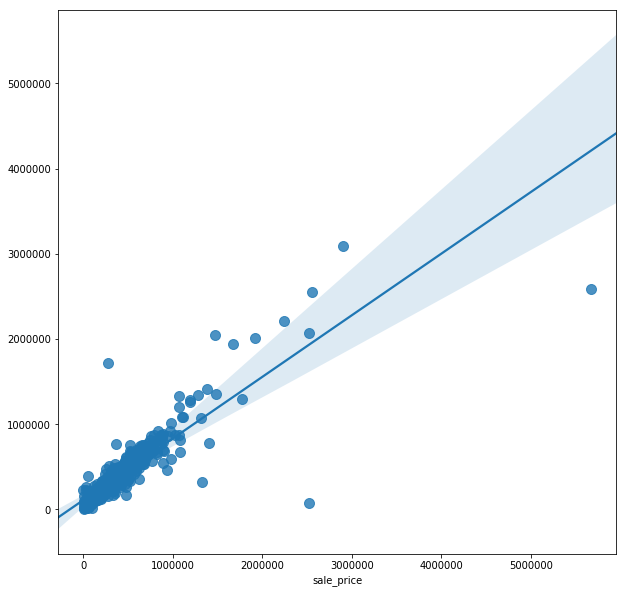

In [39]:
# https://www.dezyre.com/recipes/use-gradientboosting-classifier-and-regressor-in-python
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


 # making predictions
expected_y  = y_test
predicted_y = regressor.predict(X_test)
# summarize the fit of the model
print(); print(metrics.r2_score(expected_y, predicted_y))
print(); print(metrics.mean_squared_log_error(expected_y, predicted_y))
# plot regression
plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

In [48]:
# Load the model from the file 
model_from_joblib = joblib.load('trained_house_classifier_model.pkl')  
# These are the feature labels from our data set
feature_labels = np.array(['year_built', 'stories', 'num_bedrooms', 'full_bathrooms', 'half_bathrooms', 'livable_sqft', 'total_sqft', 'garage_sqft', 'carport_sqft', 'has_fireplace', 'has_pool', 'has_central_heating', 'has_central_cooling', 'garage_type_attached', 'garage_type_detached', 'garage_type_none', 'city_Amystad', 'city_Brownport', 'city_Chadstad', 'city_Clarkberg', 'city_Coletown', 'city_Davidfort', 'city_Davidtown', 'city_East Amychester', 'city_East Janiceville', 'city_East Justin', 'city_East Lucas', 'city_Fosterberg', 'city_Hallfort', 'city_Jeffreyhaven', 'city_Jenniferberg', 'city_Joshuafurt', 'city_Julieberg', 'city_Justinport', 'city_Lake Carolyn', 'city_Lake Christinaport', 'city_Lake Dariusborough', 'city_Lake Jack', 'city_Lake Jennifer', 'city_Leahview', 'city_Lewishaven', 'city_Martinezfort', 'city_Morrisport', 'city_New Michele', 'city_New Robinton', 'city_North Erinville', 'city_Port Adamtown', 'city_Port Andrealand', 'city_Port Daniel', 'city_Port Jonathanborough', 'city_Richardport', 'city_Rickytown', 'city_Scottberg', 'city_South Anthony', 'city_South Stevenfurt', 'city_Toddshire', 'city_Wendybury', 'city_West Ann', 'city_West Brittanyview', 'city_West Gerald', 'city_West Gregoryview', 'city_West Lydia', 'city_West Terrence'])

# Create a numpy array based on the model's feature importances
importance = model_from_joblib.feature_importances_

# Sort the feature labels based on the feature importancerankingsfrom the model
feature_indexes_by_importance = importance.argsort()

# Print each feature label, from most important to least important
for index in feature_indexes_by_importance:
    print("{} - {:.2f}%".format(feature_labels[index], (importance[index] * 100.0)))

city_New Robinton - 0.00%
city_New Michele - 0.00%
city_Martinezfort - 0.00%
city_Julieberg - 0.00%
city_Davidtown - 0.00%
city_Rickytown - 0.00%
city_Lake Jennifer - 0.01%
city_West Terrence - 0.01%
city_West Brittanyview - 0.01%
city_South Stevenfurt - 0.01%
city_Fosterberg - 0.01%
city_East Justin - 0.01%
city_Leahview - 0.02%
city_Joshuafurt - 0.03%
city_Brownport - 0.03%
city_Toddshire - 0.03%
city_Amystad - 0.04%
city_Wendybury - 0.04%
city_Port Adamtown - 0.04%
city_East Janiceville - 0.04%
city_Port Daniel - 0.05%
city_Clarkberg - 0.08%
city_Port Jonathanborough - 0.11%
garage_type_detached - 0.12%
city_Davidfort - 0.12%
city_West Lydia - 0.15%
has_central_cooling - 0.16%
has_central_heating - 0.16%
city_Jenniferberg - 0.18%
city_West Gerald - 0.19%
city_East Amychester - 0.20%
city_North Erinville - 0.21%
city_Lewishaven - 0.24%
city_Morrisport - 0.26%
city_West Gregoryview - 0.33%
city_East Lucas - 0.35%
city_Richardport - 0.35%
city_Lake Carolyn - 0.38%
city_Lake Dariusborou

In [50]:
# to provide the features in the exact same arrangement as in training set
house_to_value =[ 
    # House features
    2006,   # year_built
    1,      # stories
    4,      # num_bedrooms
    3,      # full_bathrooms
    0,      # half_bathrooms 
    2200,   # livable_sqft
    2350,   # total_sqft
    0,      # garage_sqft
    0,      # carport_sqft
    True,   # has_fireplace
    False,  # has_pool
    True,   # has_central_heating
    True,   # has_central_cooling
    
    # Garage type: Choose only one
    0,      # attached
    0,      # detached
    1,      # none
    
    # City: Choose only one
    0,      # Amystad
    1,      # Brownport
    0,      # Chadstad
    0,      # Clarkberg
    0,      # Coletown
    0,      # Davidfort
    0,      # Davidtown
    0,      # East Amychester
    0,      # East Janiceville
    0,      # East Justin
    0,      # East Lucas
    0,      # Fosterberg
    0,      # Hallfort
    0,      # Jeffreyhaven
    0,      # Jenniferberg
    0,      # Joshuafurt
    0,      # Julieberg
    0,      # Justinport
    0,      # Lake Carolyn
    0,      # Lake Christinaport
    0,      # Lake Dariusborough
    0,      # Lake Jack
    0,      # Lake Jennifer
    0,      # Leahview
    0,      # Lewishaven
    0,      # Martinezfort
    0,      # Morrisport
    0,      # New Michele
    0,      # New Robinton
    0,      # North Erinville
    0,      # Port Adamtown
    0,      # Port Andrealand
    0,      # Port Daniel
    0,      # Port Jonathanborough
    0,      # Richardport
    0,      # Rickytown
    0,      # Scottberg
    0,      # South Anthony
    0,      # South Stevenfurt
    0,      # Toddshire
    0,      # Wendybury
    0,      # West Ann
    0,      # West Brittanyview
    0,      # West Gerald
    0,      # West Gregoryview
    0,      # West Lydia
    0       # West Terrence
    ]
# To look at a single house
homes_to_value=[house_to_value]

# Run the model and make a prediction for each house in the homes_to_value array
predicted_home_values = model_from_joblib.predict(homes_to_value)

# look at hethe first prediction return
predicted_value = predicted_home_values[0]
print("This house has an estimated value of ${:,.2f}".format(predicted_value))

This house has an estimated value of $565,645.02


### Grid Search - to obtain Optimal Hyperpararmeter Values

In [33]:
# split into train test sets
# using 5000 rows to lower the processing time. But still I need more than 8hrs
y = data['sale_price'][0:5000]  # predict value
X = features_df[0:5000]                # features

# Normally the data split between test-train is 20%-80%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, X_test.shape)

(4000, 63) (1000, 63)


In [31]:

from sklearn.model_selection import GridSearchCV
# Create the model
model = GradientBoostingRegressor()

# Parameters we want to try
param_grid ={       
    'n_estimators': [500, 1000, 3000],
    'max_depth' : [4, 6],
    'min_samples_leaf': [3, 5, 9, 17],
    'learning_rate' : [0.1, 0.05, 0.02, 0.01],
    'max_features': [1.0, 0.3, 0.1],
    'loss': ['ls','lad','huber']
}

# Define the grid search we want to run, Run it with four cpus in parallel ( n_jobs)
gs_cv = GridSearchCV(model, param_grid, n_jobs=4, cv=5)  # cv :five-fold cross-validation
                                                   

# Run the grid search - on only the training data
gs_cv.fit(X_train, y_train)

# Print the parameters that ave us the best result
print(gs_cv.best_params_)

# Find the error rate on the training set
mse = mean_absolute_error(y_train, gs_cv.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

# Find the error rate on the test set
mse = mean_absolute_error(y_test, gs_cv.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

{'learning_rate': 0.01, 'loss': 'huber', 'max_depth': 6, 'max_features': 0.1, 'min_samples_leaf': 9, 'n_estimators': 3000}
Training Set Mean Absolute Error: 47583.6544
Test Set Mean Absolute Error: 59545.3971
